#    Billionaires Data Analysis

## 1. Introduction

The factors that contribute to people's wealth has long been a subject of study and debate, reflecting the complexities of economic systems, societal structures, and individual opportunities. In recent years, the concentration of wealth among the world's billionaires has become particularly notable, offering a unique lens through which we can examine the broader patterns and dynamics of wealth distribution.

Understanding the factors that predict wealth is crucial for several reasons. Firstly, it aids in identifying the key drivers behind wealth accumulation, such as industry trends, economic policies, and demographic factors. This understanding is vital for policymakers and economists to develop more equitable economic policies. Secondly, it offers insights for individuals and businesses looking to navigate the economic landscape effectively. Finally, it contributes to a broader understanding of socio-economic dynamics, which is essential for addressing issues like wealth inequality and promoting more inclusive growth.


**main topic: what features contribute to billionaire's wealth?

### 1.1Methodology

For these analysis, we use a comprehensive dataset from Kaggle, which includes detailed information about global billionaires, encompassing personal attributes, business involvements, and industry sectors. 

This rich dataset facilitates a thorough exploration of wealth distribution among billionaires, highlighting the influence of various industries on wealth accumulation and offering demographic insights into the world's wealthiest individuals.   

1. Describe the dataset

2. workflow of data import/cleaning, grouping, EDA (Exploratory Data Analysis), 


The dataset contains 2640 entries and 35 columns. 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Billionaires Statistics Dataset.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [2]:
dataset_info = df.info()
missing_values = df.isnull().sum()

dataset_info, missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

(None,
 age                                             65
 country                                         38
 city                                            72
 organization                                  2315
 birthDate                                       76
 firstName                                        3
 title                                         2301
 state                                         1887
 residenceStateRegion                          1893
 birthYear                                       76
 birthMonth                                      76
 birthDay                                        76
 cpi_country                                    184
 cpi_change_country                             184
 gdp_country                                    164
 gross_tertiary_education_enrollment            182
 gross_primary_education_enrollment_country     181
 life_expectancy_country                        182
 tax_revenue_country_country                    183
 tota

 We delete 'organization', 'title', 'state', and 'residenceStateRegion' with a high number of missing entries. Also, fill blank 'age', 'country', 'city', 'birthDate', 'firstName', and various country-related statistics

In [3]:
columns_to_delete = ['organization', 'title', 'state', 'residenceStateRegion']
df = df.drop(columns=columns_to_delete, errors='ignore')

columns_to_fill = ['age', 'country', 'city', 'birthDate', 'firstName']
for column in columns_to_fill:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True)#here we do an imputation -- impute the numeric columns' missing values with their column means
    else:
        df.dropna(subset = [column], inplace=True)
        
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
df.to_csv('cleaned data.csv')

## 2. statistics summary

the rationale behind the selection of certain variables.(regions/countries/industries/age/gender/)

In [41]:
#describe statistics of these billionaires
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2369.000000,2369.000000,2371.000000,2371.000000,2371.000000,2370.000000,2371.000000,2.386000e+03,2386.000000,2386.000000
mean,1274.338793,4728.166201,65.334399,1957.039153,5.744307,12.087895,128.014542,4.419460,67.413581,102.872079,78.087938,12.548354,43.883720,5.112567e+08,34.850590,11.672491
std,741.455175,10052.275122,13.139556,13.154833,3.711647,9.919836,26.697742,3.509303,21.478173,4.759625,3.751877,5.381545,12.030108,5.522225e+08,16.985430,87.171035
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,636.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891
50%,1272.000000,2400.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,67.000000,101.800000,78.500000,9.600000,40.800000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4300.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,38.963745,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


#### Age vs Industries

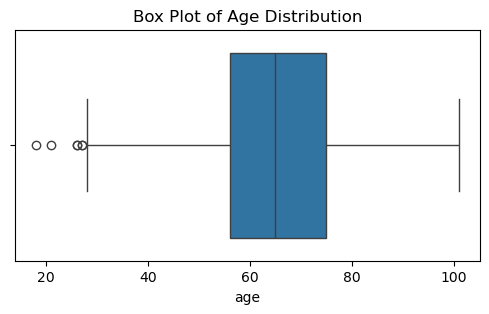

In [87]:
# First create a pivot table
age_industry_pivot = pd.pivot_table(df, values='rank', index='industries', columns='age', aggfunc='count')
#age_industry_pivot.fillna(0, inplace=True)
# Box plot for Age distribution
plt.figure(figsize=(6, 3))
sns.boxplot(x='age', data=df)
plt.title('Box Plot of Age Distribution')
plt.show()

The box plot of the age distribution for billionaires indicates a median age between 60 and 70 years. The overall age range of billionaires, including outliers, is from about 20 to just over 80 years, reflecting a broad spectrum but with a focus on the middle to later years of working life.    This is consistent with the expectation that wealth accumulation is a process that typically spans many years.

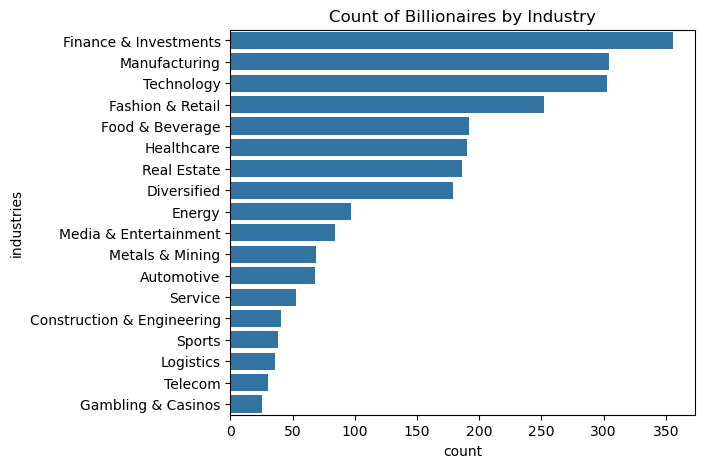

In [88]:
# Box plot for Industries
plt.figure(figsize=(6, 5))
sns.countplot(y='industries', data=df, order = df['industries'].value_counts().index)
plt.title('Count of Billionaires by Industry')
plt.show()

In the bar plot showing the number of billionaires in each industry, we find that 

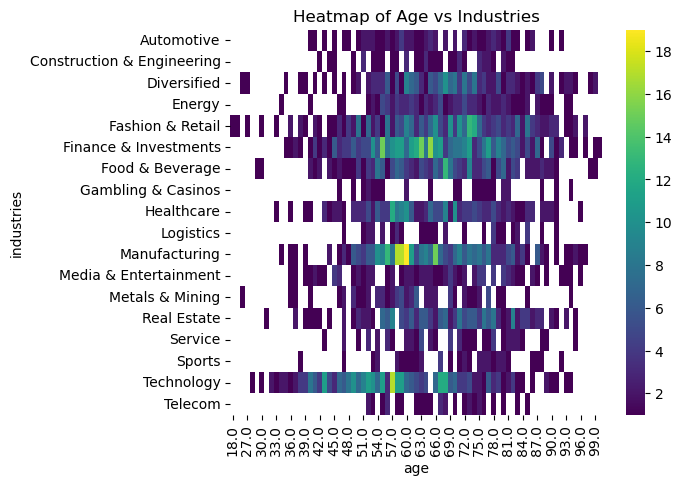

In [89]:
plt.figure(figsize=(6, 5))
sns.heatmap(age_industry_pivot, cmap='viridis')
plt.title('Heatmap of Age vs Industries')
plt.show()

#### Heatmap for Age vs Country

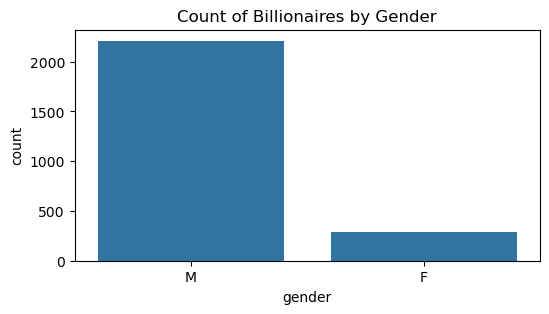

In [90]:
age_country_pivot = pd.pivot_table(df, values='rank', index='country', columns='age', aggfunc='count')
age_country_pivot.fillna(0, inplace=True)

# Box plot for Gender distribution
# Check if gender column is present in the dataset
plt.figure(figsize=(6, 3))
sns.countplot(x='gender', data=df)
plt.title('Count of Billionaires by Gender')
plt.show()

his plot would show the distribution of billionaires by gender, providing insights into gender representation among the world’s wealthiest.

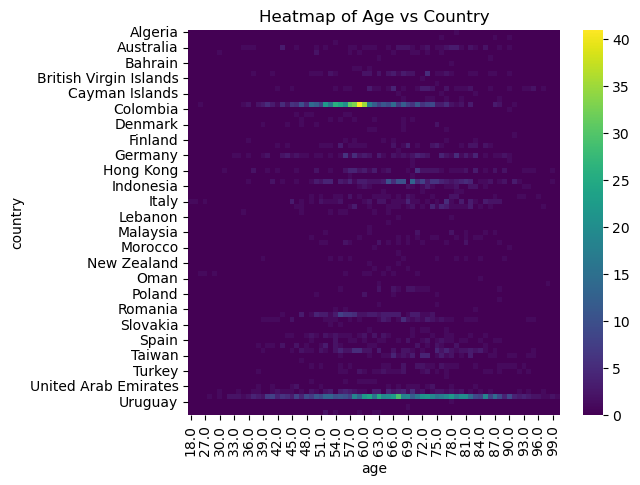

In [91]:
plt.figure(figsize=(6, 5))
sns.heatmap(age_country_pivot, cmap='viridis')
plt.title('Heatmap of Age vs Country')
plt.show()

this heatmap displays the distribution of billionaires across different countries, segmented by their ages.

## 3. correlation analysis

Explore the relationships between different socioeconomic indicators and wealth.


### 3.1 self-made vs inherited

### 3.2 non-obvious factors

many people believe in zodiac signs as they think the time a person is born will affect his/her personality.
We will test wheter this is true by testing whether the factors like born month and born date, 
and eventually zodiac sign would influence billionaire's wealth or their count.

In [48]:
#firstly, add a column of birth months in string e.g. Jan, Feb, since we usually express months in string
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
months_dict = {}
for i in range(1,13):
    months_dict[str(i)]=months[i-1]
df['birthMonthStr']=df['birthMonth'].transform(lambda x: months_dict[str(int(x))]) #use the numeric value of months to make string categories
months_dict


{'1': 'Jan',
 '2': 'Feb',
 '3': 'Mar',
 '4': 'Apr',
 '5': 'May',
 '6': 'Jun',
 '7': 'Jul',
 '8': 'Aug',
 '9': 'Sep',
 '10': 'Oct',
 '11': 'Nov',
 '12': 'Dec'}

In [49]:
#examine the  influence of month on final wealth
months_wealth_mean = df.groupby('birthMonthStr')['finalWorth'].mean()
months_wealth_mean = months_wealth_mean.reindex(index = months) #reorder the index value pairs so that the order is from Jan to Dec
months_wealth_mean

birthMonthStr
Jan    3836.312849
Feb    5280.745342
Mar    6363.541667
Apr    4785.465116
May    4084.482759
Jun    6597.468354
Jul    4116.489362
Aug    5417.857143
Sep    4713.265306
Oct    5695.121951
Nov    3787.248322
Dec    3628.000000
Name: finalWorth, dtype: float64

Text(0.5, 1.0, 'mean of final wealth by birth month')

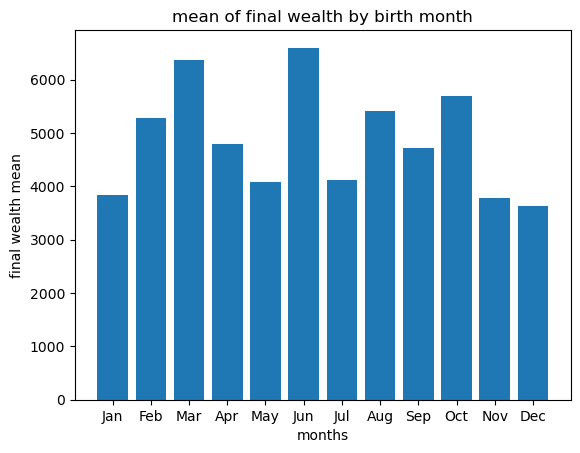

In [50]:
#making a plot:
f, ax = plt.subplots()
ax.bar(months_wealth_mean.index, months_wealth_mean)
ax.set_xlabel("months")
ax.set_ylabel("final wealth mean")
ax.set_title("mean of final wealth by birth month")

There is notible differences between months in terms of mean of final wealth. Jun and Mar have the most outstanding mean of final wealth of those billionaires.

In [96]:
#examine the number of billinaires by month
months_count = df.groupby('birthMonthStr').size()
months_count = months_count.reindex(index = months)#reorder index
months_count

birthMonthStr
Jan    537
Feb    161
Mar    192
Apr    172
May    174
Jun    158
Jul    188
Aug    196
Sep    196
Oct    205
Nov    149
Dec    175
dtype: int64

Text(0.5, 1.0, 'number of billionaires by birth month')

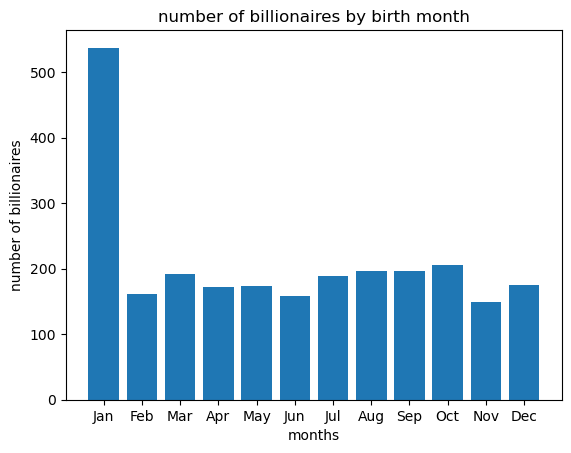

In [97]:
f, ax = plt.subplots()
ax.bar(months_count.index, months_count)
ax.set_xlabel("months")
ax.set_ylabel("number of billionaires")
ax.set_title("number of billionaires by birth month")

We can observe that the number of billionaires born in January is significantly greater than those born in other months.

In [ ]:
#Now we add a column as zodiac sign, which is obtained from the billionaires's numeric born month+date

In [ ]:
#Then, we combine the columns of birthYear, birthMonth, and birthDate and make a scatter plot.
#we use this process to solve the question: is there a speciric time period where significantly many billionaires were born?

## 4. Machine Learning

clustering or regression analysis to predict the wealth distribution

## 5. Results

## 6. discussion & conclusion